### 问题一：

数据处理：请参考近4年的工业数据(见附件一“325个数据样本数据.xlsx”)的预处理结果，依“样本确定方法”（附件二）对285号和313号数据样本进行预处理（原始数据见附件三“285号和313号样本原始数据.xlsx”）并将处理后的数据分别加入到附件一中相应的样本号中，供下面研究使用。

> 认真阅读《附件二：样本确定方法.docx》

考点：数据预处理 ====> 补全数据&修正数据

前提假设：
    
- 短时间内对于人为操作对于采样数据的影响体现不及时，采样数据仍然呈现相应的高斯分布规律
    
相应公式：

+ 缺失率(Missing Value Ratio) = $\frac{\displaystyle{\mathbb{I}}(v_{loss}^{(i)} = 0|d_{loss}^{(i)}  \in \displaystyle{\mathcal{D}}_{loss})}{\displaystyle{\mathbb{I}}(v_{loss}^{(i)} |d_{loss}^{(i)} \in \displaystyle{\mathcal{D}}_{loss})}$ 
+ 变异系数(Coefficient of Variation) =  $\frac{\displaystyle{\text{std}}(\displaystyle{\mathcal{V}_{r})}}{\displaystyle{\text{mean}}(\displaystyle{\mathcal{V}_{r}})}$ 

可调参数：

+ $r_{1}$ => 缺失率(Missing Value Ratio) 

解题思路：

+ 补全数据：

    - 即需要先确认 样本数据集 $\displaystyle{\mathcal{X}}_{s}$ 中 285号 $x_{s}^{(285)}$ 样本 和 313号 $x_{s}^{(313)}$ 样本 存在属性值缺失的属性集合 $\displaystyle{\mathcal{D}}_{miss}^{(285)}$ 和 $\displaystyle{\mathcal{D}}_{miss}^{(313)}$
        - 然后判断这些缺失的属性 $d_{miss} \in \displaystyle{\mathcal{D}}_{miss}$ 是否在 原始数据集 $\displaystyle{\mathcal{X}}_{r}$ 中也存在数值缺失，依据 缺失率(Missing Value Ratio) 对其进行删减 $\displaystyle{\hat{\mathcal{D}}}_{miss}$
    - 对于剩余的 缺失属性集合 $\displaystyle{\hat{\mathcal{D}}}_{miss}$ 中的缺失的属性值从 原始数据集 $\displaystyle{\mathcal{X}}_{r}$ 中以求取均值 mean($\displaystyle{\mathcal{V}_{r}}$) 的方式得到

+ 修正数据：

    - 即需要先确认 原始数据集 $\displaystyle{\mathcal{X}}_{r}$ 中 285号 $x_{s}^{(285)}$ 和 313号 $x_{s}^{(313)}$ 样本中各属性的属性值缺失情况，对于缺失情况较大的属性则不对 样本数据集 $\displaystyle{\mathcal{X}}_{s}$ 中的 属性值 $\displaystyle{\mathcal{D}}$ 进行修正
    - 将 285号 $x_{s}^{(285)}$ 和 313号 $x_{s}^{(313)}$ 样本中需要修正的属性依据 正态分布 $x \sim \displaystyle{\mathcal{N}}(\mu, \sigma)$ 假设检验，然后使用 依达拉原则(3$\sigma$) 剔除一些不在范围内的样本，对剩余的原始数据 $\displaystyle{\hat{\mathcal{X}}_{r}}$ 进行求取均值 mean($\displaystyle{\hat{\mathcal{V}}_{r}}$) 的操作

代码逻辑：

+ 补全数据：

    - 首先从 样本数据集 $\displaystyle{\mathcal{X}}_{s}$ 中确定样本 285号 $x_{s}^{(285)}$ 和 313号 $x_{s}^{(313)}$ 缺失的属性集合 $\displaystyle{\mathcal{D}}_{loss}^{(285)}$ 和 $\displaystyle{\mathcal{D}}_{loss}^{(313)}$
    - 然后分别对两个集合中缺失的属性 $d_{loss} \in \displaystyle{\mathcal{D}}_{loss}$ 对应到 原始数据集 $\displaystyle{\mathcal{X}}_{r}$ 中，逐一对每个缺失的属性值进行判别
    - 这里使用 缺失率(Missing Value Ratio) $r_{1}$ 对当前 缺失的属性 $d_{loss}$ 在 原始数据集 $\displaystyle{\mathcal{X}}_{r}$ 中 数据采集的状况 进行评估
        + 当比值 $ r_{1} \ge \frac{9}{10} $ 时，对当前 缺失的属性的值 $\displaystyle{\mathcal{V}_{d_{loss}}}$ 进行求均值 mean($\displaystyle{\mathcal{V}_{d_{loss}}}$) 处理；(此处求取均值之前仍然需要对原始数据进行修正，修正步骤见下述)
        + 当比值 $ r_{1} < \frac{9}{10} $ 时，对当前 缺失的属性 $d_{loss}$ 进行直接忽略处理；

+ 修正数据：

    + 对样本 $x_{s}^{(285)}$ 和 $x_{s}^{(313)}$ 进行 缺失的属性 $d_{loss}^{(285)} \in \displaystyle{\mathcal{D}}_{loss}^{(285)}$ 和 $d_{loss}^{(313)} \in \displaystyle{\mathcal{D}}_{loss}^{(313)}$ 求均值之前 先需要进行异常值处理
        - 根据拉依达准则（3$\sigma$准则）去除异常值，得到 缺失的属性 $d_{loss}^{(i)}$ 对应的过滤后的 原始属性值 集合 $\displaystyle{\hat{\mathcal{V}}_{d_{loss}}}$ 
        - 将处理后的 原始属性值集合 $\displaystyle{\hat{\mathcal{V}}_{d_{loss}}}$ 中的属性值进行求取 均值 mean($\displaystyle{\hat{\mathcal{V}}_{d_{loss}}}$) 操作，将结果加入到 $\displaystyle{\mathcal{X}}_{s}$ 中对应的 样本数据  $x_{s}^{(285)}$ 和 $x_{s}^{(313)}$ 对应的 缺失的属性 $d_{loss}^{(i)}$ 中

In [1]:
import numpy as np
import missingno as msno

from scipy import stats
from matplotlib import pyplot as plt

# Suppress warnings from pandas
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn')
plt.rcParams['font.family'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
%matplotlib inline

In [2]:
%store -r origin_data
%store -r samples_data

In [3]:
# No.285 样本
sample_285 = samples_data.iloc[284]
sample_285 = sample_285.drop(index=sample_285.index[[x for x in range(1, 16)]], axis=1)

# 查看 No.285 数据情况
sample_285.iloc[:10]

样本编号                     Unnamed: 0_level_1         285
S-ZORB.CAL_H2.PV         氢油比                   0.273399
S-ZORB.PDI_2102.PV       反应过滤器压差                24.2082
S-ZORB.PT_2801.PV        还原器压力                  2.52887
S-ZORB.FC_2801.PV        还原器流化氢气流量              855.883
S-ZORB.TE_2103.PV        反应器上部温度                421.509
S-ZORB.TE_2005.PV        反应器底部温度                421.196
S-ZORB.PT_2101.PV        反应器顶部压力                2.42709
S-ZORB.PDT_2104.PV       反应器顶底压差                 59.703
S-ZORB.SIS_PDT_2103B.PV  反应过滤器压差                1108.29
Name: 284, dtype: object

In [4]:
# No.313 样本
sample_313 = samples_data.iloc[312]
sample_313 = sample_313.drop(index=sample_313.index[[x for x in range(1, 16)]], axis=1)

# 查看 No.313 数据情况
sample_313.iloc[:10]

样本编号                     Unnamed: 0_level_1         313
S-ZORB.CAL_H2.PV         氢油比                   0.261936
S-ZORB.PDI_2102.PV       反应过滤器压差                17.1835
S-ZORB.PT_2801.PV        还原器压力                  2.41706
S-ZORB.FC_2801.PV        还原器流化氢气流量              850.301
S-ZORB.TE_2103.PV        反应器上部温度                424.969
S-ZORB.TE_2005.PV        反应器底部温度                424.522
S-ZORB.PT_2101.PV        反应器顶部压力                 2.3159
S-ZORB.PDT_2104.PV       反应器顶底压差                61.7014
S-ZORB.SIS_PDT_2103B.PV  反应过滤器压差                1250.69
Name: 312, dtype: object

In [5]:
def find_dummy_colmuns(sample):
    dummy_columns = []
    for (code_name, i18n_name) in sample.keys():
        if not sample[(code_name, i18n_name)]:
            dummy_columns.append(code_name)
    return dummy_columns

In [6]:
sample_285_dummy_columns = find_dummy_colmuns(sample_285)
# 查看 No.285 属性值为空的情况
print(f"No.285 属性值为空的列: {sample_285_dummy_columns}")

No.285 属性值为空的列: ['S-ZORB.FT_1501.PV', 'S-ZORB.FT_1002.PV', 'S-ZORB.FC_1202.PV', 'S-ZORB.FT_1501.TOTAL', 'S-ZORB.FT_5102.PV', 'S-ZORB.FT_2901.DACA', 'S-ZORB.FC_1104.DACA', 'S-ZORB.FT_2803.DACA', 'S-ZORB.FT_1502.DACA', 'S-ZORB.TEX_3103A.DACA', 'S-ZORB.FT_5102.DACA.PV']


In [7]:
# 查看 No.313 属性值为空的情况
sample_313_dummy_columns = find_dummy_colmuns(sample_313)
print(f"No.313 属性值为空的列: {sample_313_dummy_columns}")

No.313 属性值为空的列: ['S-ZORB.FT_1501.PV', 'S-ZORB.FT_1002.PV', 'S-ZORB.FT_1501.TOTAL', 'S-ZORB.FT_2901.DACA', 'S-ZORB.FC_1104.DACA', 'S-ZORB.FT_2803.DACA', 'S-ZORB.FT_1502.DACA', 'S-ZORB.TEX_3103A.DACA']


In [8]:
# 根据在样本数据中缺失值的属性列，拆分原始数据中285号样本的数据
print("拆分出来的285号样本的原始数据")
raw_285 = origin_data.iloc[:40]
raw_285[sample_285_dummy_columns].head(n=5)

拆分出来的285号样本的原始数据


,S-ZORB.FT_1501.PV,S-ZORB.FT_1002.PV,S-ZORB.FC_1202.PV,S-ZORB.FT_1501.TOTAL,S-ZORB.FT_5102.PV,S-ZORB.FT_2901.DACA,S-ZORB.FC_1104.DACA,S-ZORB.FT_2803.DACA,S-ZORB.FT_1502.DACA,S-ZORB.TEX_3103A.DACA,S-ZORB.FT_5102.DACA.PV
,新氢进装置流量,1#催化汽油进装置流量,D121顶去放火炬流量,新氢进装置流量,0,D-109松动风流量,进料调节阀旁路流量,紧急氢气去D-102流量,补充氢压缩机出口返回管流量,EH-102加热元件/A束温度,D-201含硫污水排量
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
# 根据在样本数据中缺失值的属性列，拆分原始数据中313号样本的数据
print("拆分出来的313号样本的原始数据")
raw_313 = origin_data.iloc[41:]
raw_313[sample_313_dummy_columns].head(n=5)

拆分出来的313号样本的原始数据


,S-ZORB.FT_1501.PV,S-ZORB.FT_1002.PV,S-ZORB.FT_1501.TOTAL,S-ZORB.FT_2901.DACA,S-ZORB.FC_1104.DACA,S-ZORB.FT_2803.DACA,S-ZORB.FT_1502.DACA,S-ZORB.TEX_3103A.DACA
,新氢进装置流量,1#催化汽油进装置流量,新氢进装置流量,D-109松动风流量,进料调节阀旁路流量,紧急氢气去D-102流量,补充氢压缩机出口返回管流量,EH-102加热元件/A束温度
41,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
# 计算 No.285 样本 上述缺失属性集合中 属性值存在 缺失率，并输出缺失率不超过 阈值的列名
dummy_285 = raw_285[sample_285_dummy_columns]
dummy_285_nonzeroratio = dummy_285.astype(bool).sum(axis=0) / dummy_285.shape[0]
nodummy_285_columns = []
for (code_name, i18n_name) in dummy_285_nonzeroratio.keys():
    if dummy_285_nonzeroratio[(code_name, i18n_name)] >= 0.9:
        nodummy_285_columns.append(code_name)
print(nodummy_285_columns)

[]


In [11]:
# 计算 No.313 样本 上述缺失属性集合中 属性值存在 缺失率，并输出缺失率不超过 阈值的列名
dummy_313 = raw_313[sample_313_dummy_columns]
dummy_313_nonzeroratio = dummy_313.astype(bool).sum(axis=0) / dummy_313.shape[0]
nodummy_313_columns = []
for (code_name, i18n_name) in dummy_313_nonzeroratio.keys():
    if dummy_313_nonzeroratio[(code_name, i18n_name)] >= 0.9:
        nodummy_313_columns.append(code_name)
print(nodummy_313_columns)

[]


In [12]:
# 缺失率 $r_1$
missing_ratio1 = 0.9  # 可调参数

In [13]:
# 计算 No.285 样本 其余属性的 缺失率，并记录存在缺失的 属性名
raw_285 = raw_285.drop(raw_285[sample_285_dummy_columns], axis=1)
raw_285_nonzeroratio = raw_285.astype(bool).sum(axis=0) / raw_285.shape[0]
raw_285_dummy_columns = []
raw_313_delete_columns = []
for (code_name, i18n_name) in raw_285_nonzeroratio.keys():
    if raw_285_nonzeroratio[(code_name, i18n_name)] != 1.0:
        raw_285_dummy_columns.append(code_name)
        if raw_285_nonzeroratio[(code_name, i18n_name)] <= missing_ratio1:
            raw_285_dummy_columns.append(code_name)
        print(f"{(code_name, i18n_name)} => {raw_285_nonzeroratio[(code_name, i18n_name)]}")
print(raw_285_dummy_columns)

[]


In [14]:
# 依据 拉依达准则 对 No.285 样本进行属性值数据修正
raw_285_filter = raw_285.replace(0, np.NaN)
raw_285_filter_describe = raw_285_filter.describe()
fix_count = 0
try:
    for (code_name, i18n_name) in raw_285_filter.keys()[2:]:
        norm_test = stats.kstest(raw_285_filter[(code_name, i18n_name)], 'norm', (raw_285_filter_describe.loc['mean', (code_name, i18n_name)], raw_285_filter_describe.loc['std', (code_name, i18n_name)]))
        if norm_test.pvalue > 0.05:
            temp_data = raw_285_filter[(code_name, i18n_name)][np.abs(raw_285_filter[(code_name, i18n_name)] - raw_285_filter_describe.loc['mean', (code_name, i18n_name)]) <= 3 * raw_285_filter_describe.loc['std', (code_name, i18n_name)]]
            if sample_285[(code_name, i18n_name)] != round(temp_data.mean(), 7):
                # print(f"{'='*10} code_name: {(code_name, i18n_name)} {'='*10}")
                sample_285[(code_name, i18n_name)] = round(temp_data.mean(), 7)
                # print(f"样本数据 修正 => {sample_285[(code_name, i18n_name)]}")
                fix_count += 1
                # print(f"{'='*40}")
except RuntimeWarning:
    pass
print(f"No.285 样本数据 修正 属性值个数 => {fix_count}")

No.285 样本数据 修正 属性值个数 => 240


In [15]:
# 统计 No.313 样本 中属性中属性值存在空值的属性
raw_313 = raw_313.drop(raw_313[sample_313_dummy_columns], axis=1)
raw_313_nonzeroratio = raw_313.astype(bool).sum(axis=0) / raw_313.shape[0]
raw_313_dummy_columns = []
raw_313_delete_columns = []
for (code_name, i18n_name) in raw_313_nonzeroratio.keys():
    if raw_313_nonzeroratio[(code_name, i18n_name)] != 1.0:
        raw_313_dummy_columns.append(code_name)
        if raw_313_nonzeroratio[(code_name, i18n_name)] <= missing_ratio1:
            raw_313_delete_columns.append(code_name)
        print(f"{(code_name, i18n_name)} => {raw_313_nonzeroratio[(code_name, i18n_name)]}")
print(raw_313_dummy_columns)

('S-ZORB.FT_1204.PV', 0) => 0.95
('S-ZORB.FC_2432.DACA', 'D-106热氮气流量') => 0.6
('S-ZORB.FT_2431.DACA', 0) => 0.85
('S-ZORB.FC_2432.PIDA.SP', '3.0步骤FIC2432.SP') => 0.6
('S-ZORB.FT_1204.DACA.PV', 'D-121含硫污水排量') => 0.95
['S-ZORB.FT_1204.PV', 'S-ZORB.FC_2432.DACA', 'S-ZORB.FT_2431.DACA', 'S-ZORB.FC_2432.PIDA.SP', 'S-ZORB.FT_1204.DACA.PV']


<AxesSubplot:>

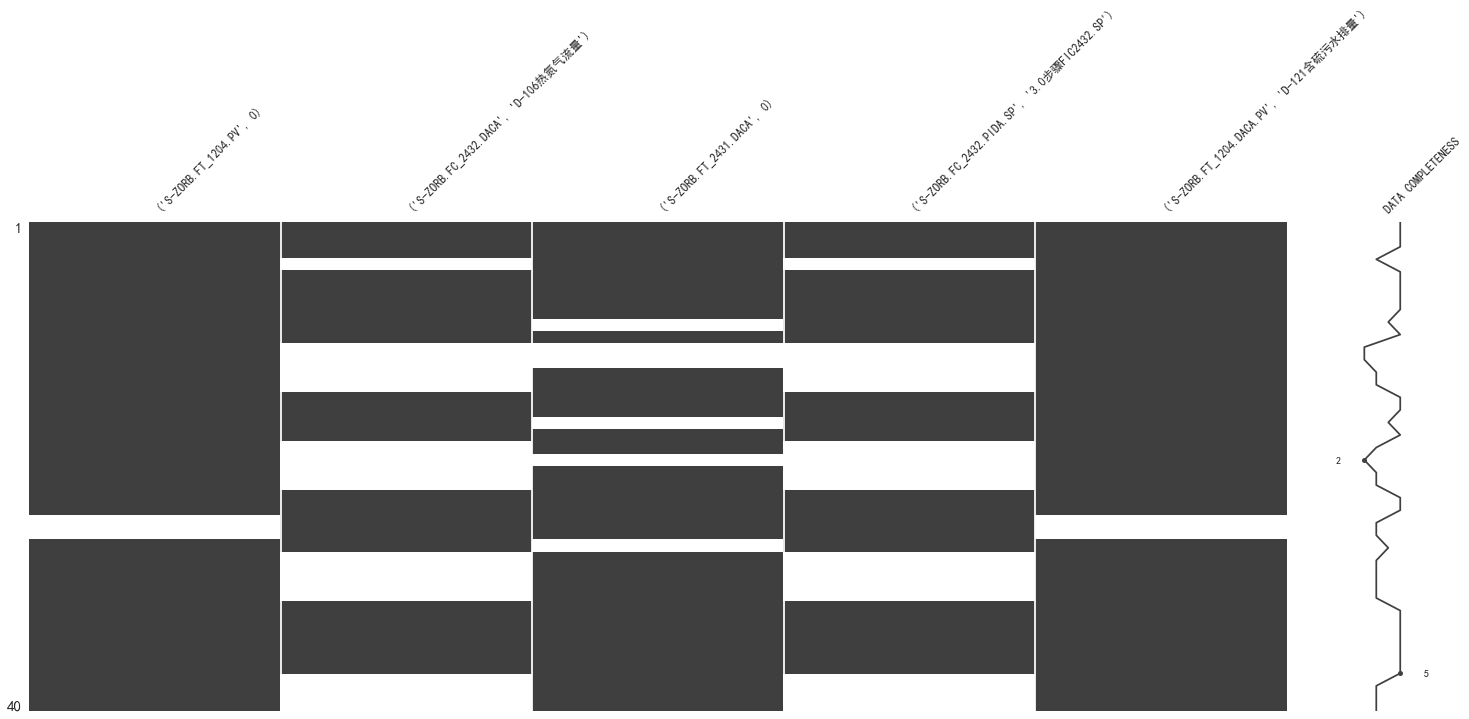

In [16]:
# 可视化呈现 No.313 样本 中属性中属性值存在空值的属性的分布
msno.matrix(raw_313[raw_313_dummy_columns].replace(0, np.nan), figsize=(25, 9), fontsize=12, labels=True)

In [17]:
# 对 No.313 样本中 存在属性值缺失的 属性进行统计学描述
dummy_raw_313 = raw_313[raw_313_dummy_columns].replace(0, np.NaN)
dummy_raw_313.describe()

,S-ZORB.FT_1204.PV,S-ZORB.FC_2432.DACA,S-ZORB.FT_2431.DACA,S-ZORB.FC_2432.PIDA.SP,S-ZORB.FT_1204.DACA.PV
,0,D-106热氮气流量,0,3.0步骤FIC2432.SP,D-121含硫污水排量
count,38.000000,24.000000,34.000000,24.000000,38.000000
mean,49.707433,55.025050,255.479771,55.977408,49.707433
std,8.341846,25.134146,234.464315,25.826184,8.341846
min,6.597014,0.488710,3.981225,0.177480,6.597014
25%,46.641427,38.959682,90.305070,39.000000,46.641427
50%,51.932390,68.763040,197.265750,69.000000,51.932390
75%,53.980428,74.201170,333.157850,79.000000,53.980428
max,57.424220,80.166200,937.010600,79.000000,57.424220


In [18]:
# 依据 拉依达准则 对 No.313 样本进行属性值数据修正
raw_313_filter = raw_313.drop(raw_313[raw_313_delete_columns], axis=1).replace(0, np.NaN)
raw_313_filter_describe = raw_313_filter.describe()
fix_count = 0
for (code_name, i18n_name) in raw_313_filter.keys()[2:]:
    norm_test = stats.kstest(raw_313_filter[(code_name, i18n_name)], 'norm', (raw_313_filter_describe.loc['mean', (code_name, i18n_name)], raw_313_filter_describe.loc['std', (code_name, i18n_name)]))
    if norm_test.pvalue > 0.05:
        temp_data = raw_313_filter[(code_name, i18n_name)][np.abs(raw_313_filter[(code_name, i18n_name)] - raw_313_filter_describe.loc['mean', (code_name, i18n_name)]) <= 3 * raw_313_filter_describe.loc['std', (code_name, i18n_name)]]
        if sample_313[(code_name, i18n_name)] != round(temp_data.mean(), 7):
            # print(f"{'='*10} code_name: {(code_name, i18n_name)} {'='*10}")
            sample_313[(code_name, i18n_name)] = round(temp_data.mean(), 7)
            # print(f"样本数据 修正 => {sample_313[(code_name, i18n_name)]}")
            fix_count += 1
            # print(f"{'='*40}")
print(f"No.313 样本数据 修正 属性值个数 => {fix_count}")

No.313 样本数据 修正 属性值个数 => 214


In [19]:
%store sample_285
%store sample_313

Stored 'sample_285' (Series)
Stored 'sample_313' (Series)
